In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
from google.colab import files

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Manan-paghdar/Manan-paghdar/main/seeds3.csv")
print(df.head(25))

    Index   Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0       1  15.26      14.84       0.8710             5.763            3.312   
1       2  14.88      14.57       0.8811             5.554            3.333   
2       3  14.29      14.09       0.9050             5.291            3.337   
3       4  13.84      13.94       0.8955             5.324            3.379   
4       5  16.14      14.99       0.9034             5.658            3.562   
5       6  14.38      14.21       0.8951             5.386            3.312   
6       7  14.69      14.49       0.8799             5.563            3.259   
7       8  14.11      14.10       0.8911             5.420            3.302   
8       9  16.63      15.46       0.8747             6.053            3.465   
9      10  16.44      15.25       0.8880             5.884            3.505   
10     11  15.26      14.85       0.8696             5.714            3.242   
11     12  14.03      14.16       0.8796            

In [3]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    210 non-null    float64
 1   Area                     210 non-null    float64
 2   Perimeter                210 non-null    float64
 3   Compactness              210 non-null    float64
 4   Length of Kernel         210 non-null    float64
 5   Width of Kernel          210 non-null    float64
 6   Assymetry Coefficient    210 non-null    float64
 7   Length of kernel groove  210 non-null    float64
 8   class                    210 non-null    float64
dtypes: float64(9)
memory usage: 14.9 KB


In [4]:
observations = list(df.index)
variables = list(df.columns)


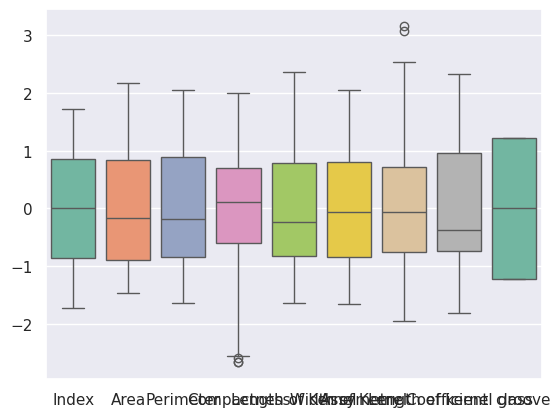

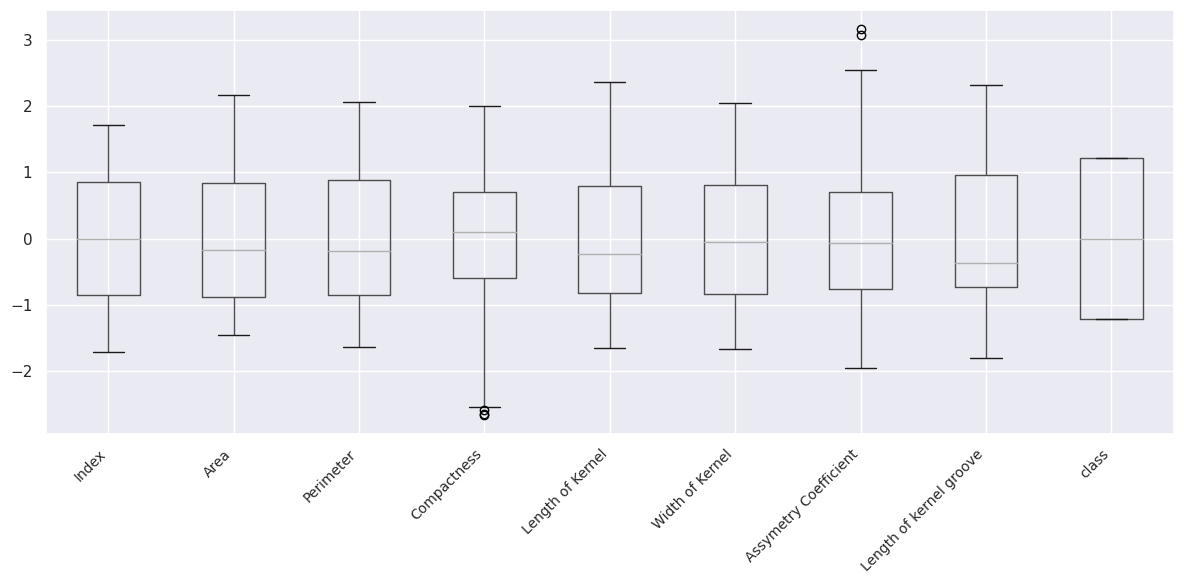

In [8]:
sns.boxplot(data=df, orient="v", palette="Set2")
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and you are creating a box plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
boxplot = df.boxplot()  # Replace df with your DataFrame variable

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels, align right, adjust font size

plt.tight_layout()  # Adjust layout to make room for label adjustments
plt.show()

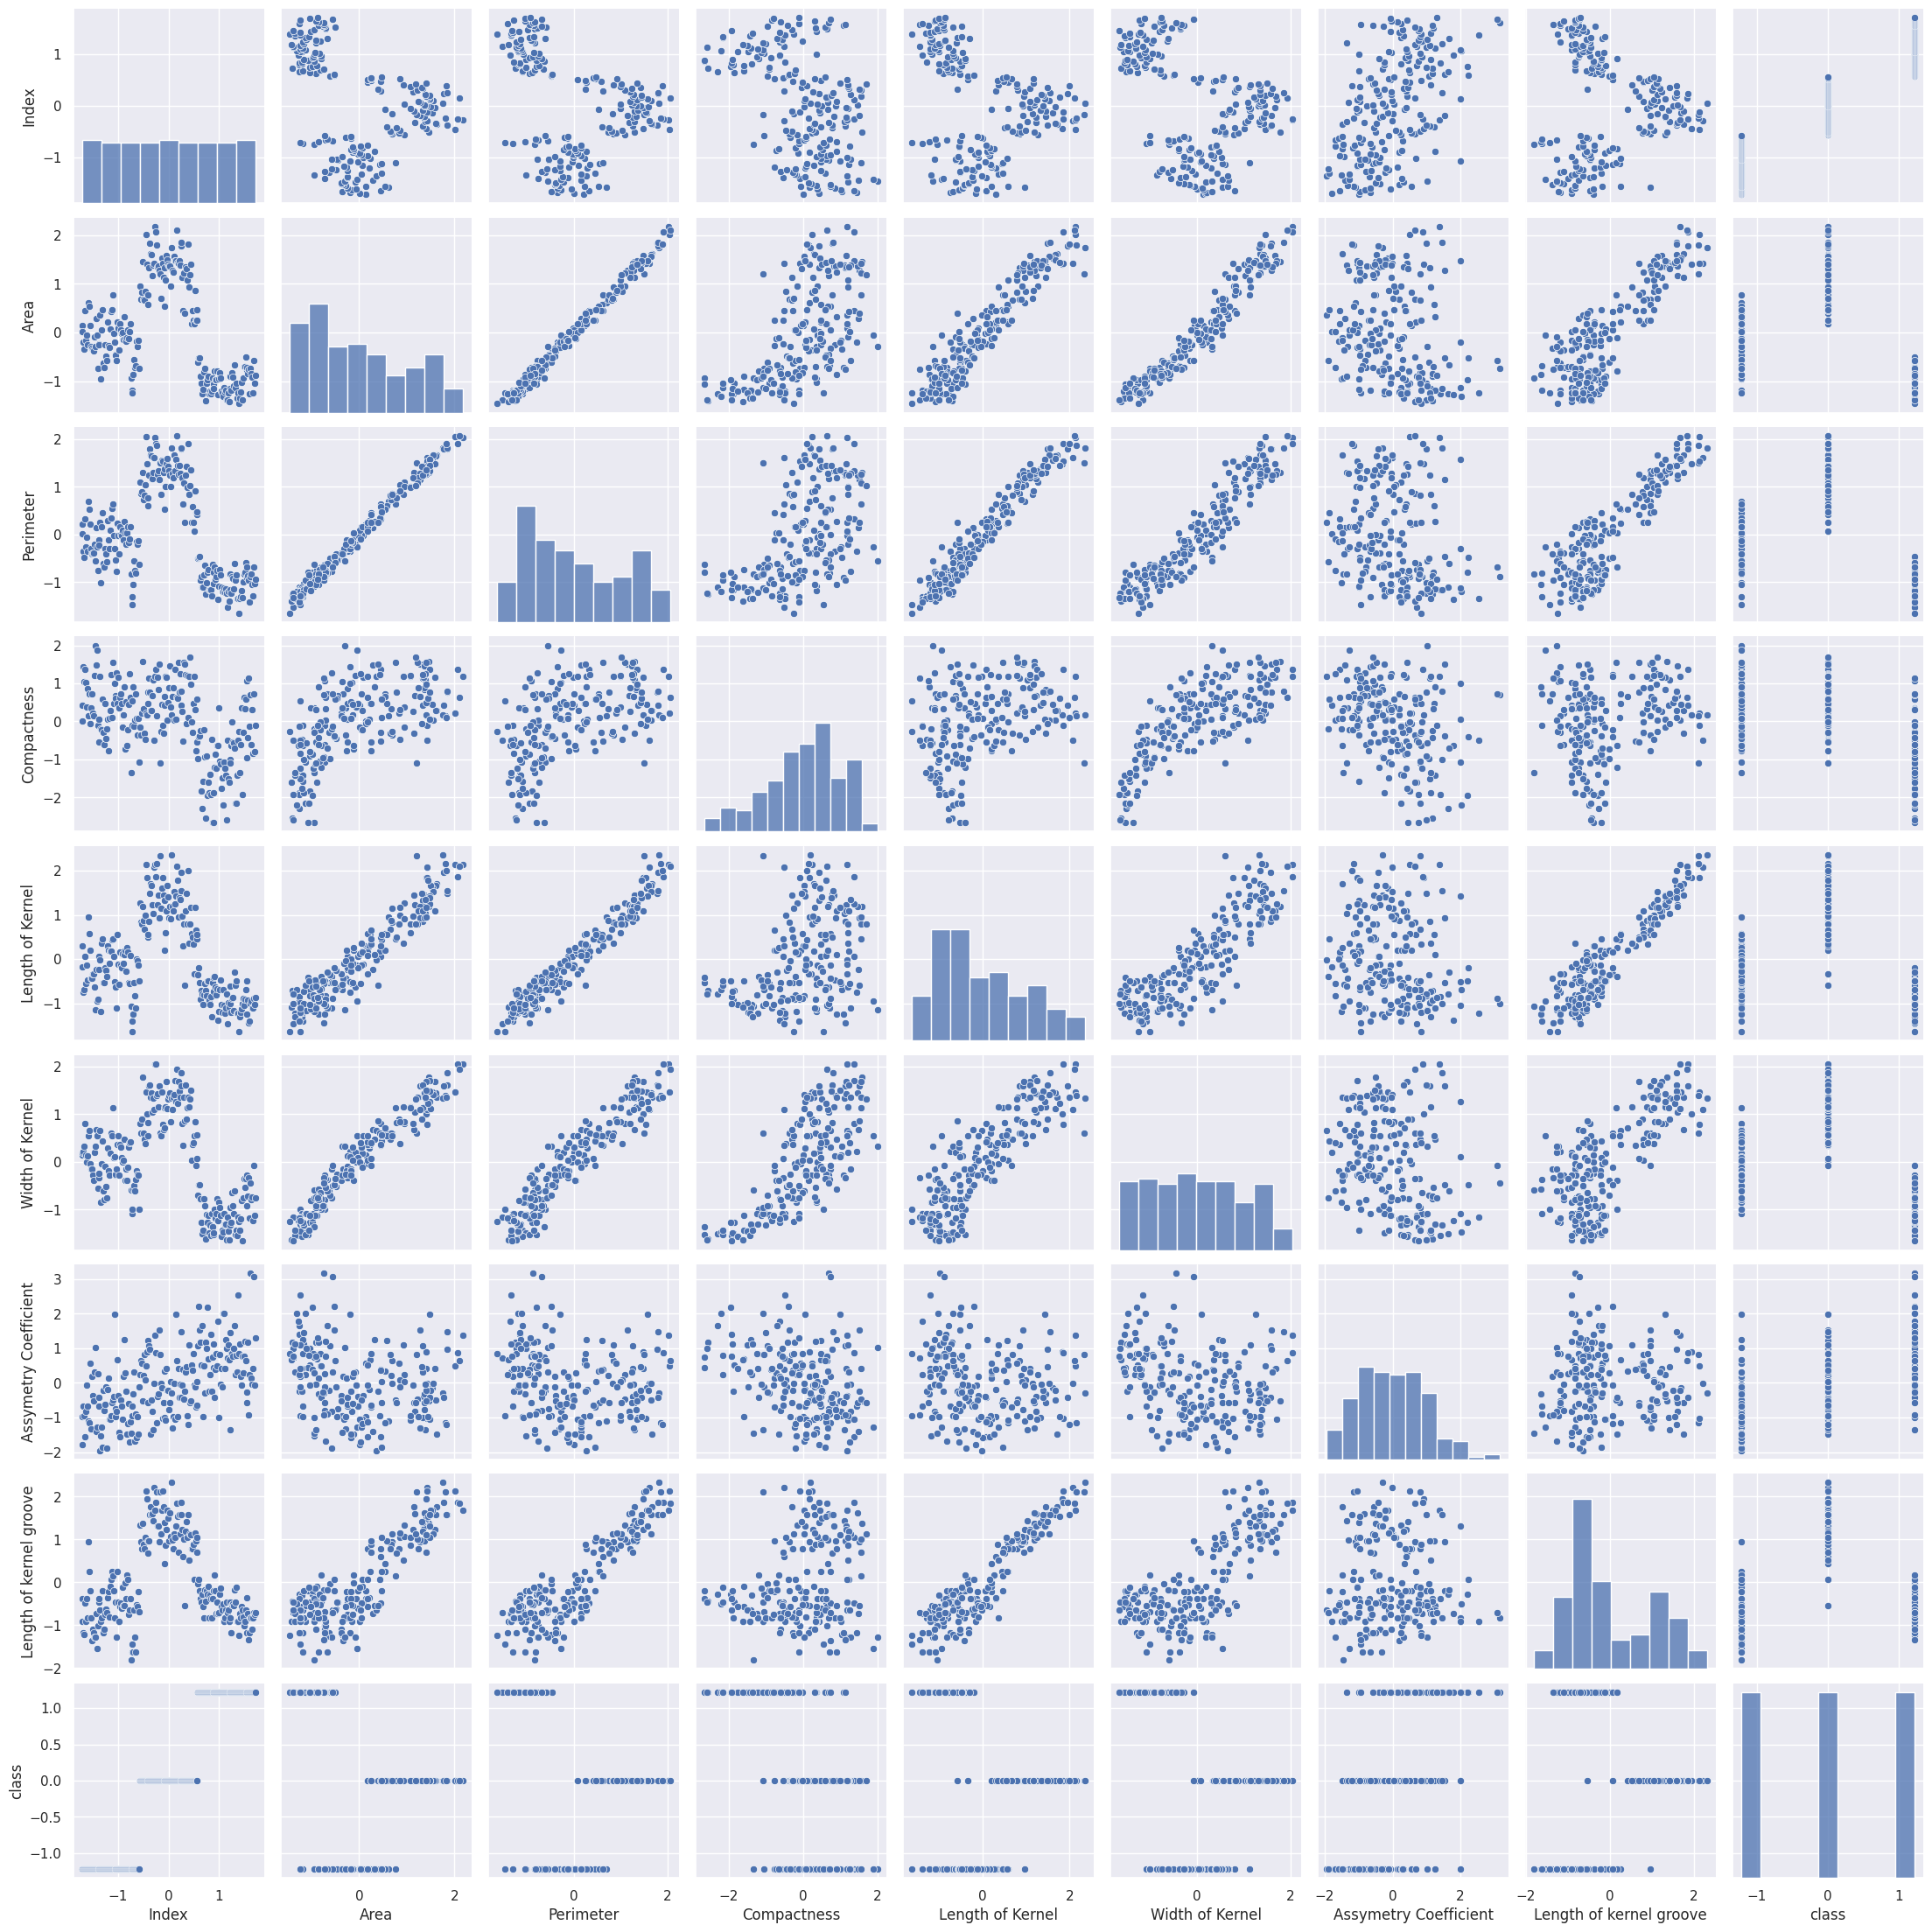

In [9]:
sns.pairplot(df)

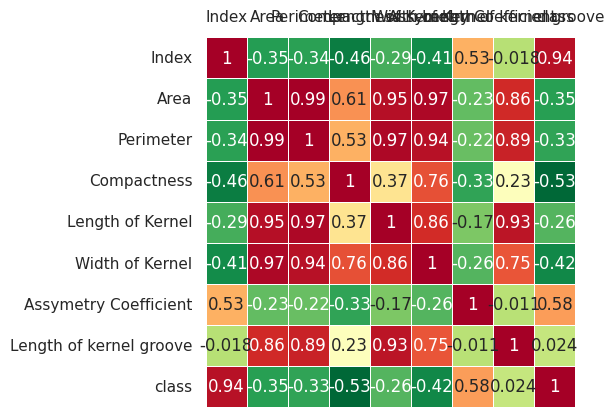

In [10]:
#Covariance
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
#plt.title('Covariance matrix')

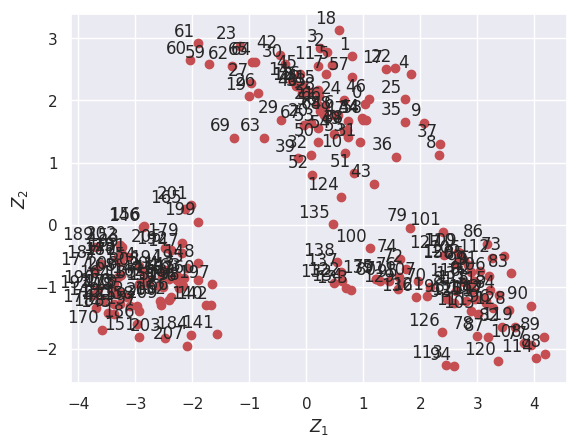

In [11]:
#Principal component analysis
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[[-2.30064805e-01 -5.01372891e-01  1.25613153e-01  4.65069436e-01
   6.44894623e-01 -2.17643181e-01  1.85255671e-02  5.07681550e-03
  -7.51386191e-04]
 [ 4.18313667e-01 -1.43095777e-01  3.07670139e-02  1.75176568e-02
   1.01583623e-01  2.41477135e-01  1.21575567e-01 -4.28120917e-01
   7.32519774e-01]
 [ 4.13775068e-01 -1.65850551e-01 -6.96870931e-02 -3.65717775e-02
   1.49310049e-01  2.71577722e-01  1.36177718e-01 -4.74307143e-01
  -6.74929934e-01]
 [ 2.92144957e-01  2.14704108e-01  7.35650910e-01  3.21817429e-01
  -1.91061688e-01 -2.84365063e-01 -2.82036818e-01 -1.43106865e-01
  -8.00771599e-02]
 [ 3.90914460e-01 -2.22148792e-01 -2.47908643e-01 -1.22543810e-01
   1.29651778e-01  1.63267050e-02 -7.94886392e-01  2.68859774e-01
   1.24104601e-02]
 [ 4.15929894e-01 -5.79974037e-02  2.45257928e-01  7.95236438e-02
   8.78450381e-02  3.15500197e-01  3.90645120e-01  7.04545252e-01
  -3.03054049e-02]
 [-1.61749697e-01 -4.18539733e-01  5.02203304e-01 -7.37216308e-01
   4.10195063e-02 -2.9725959

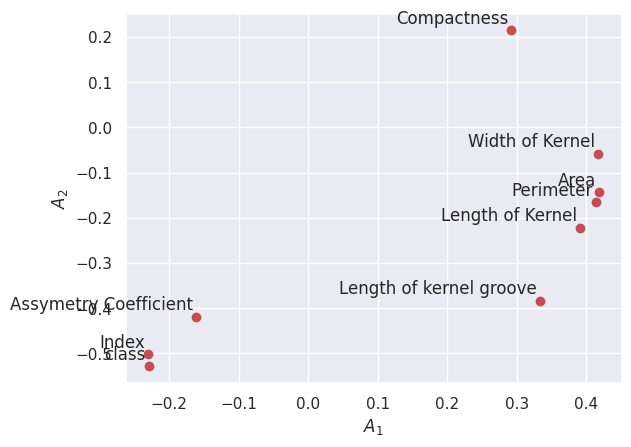

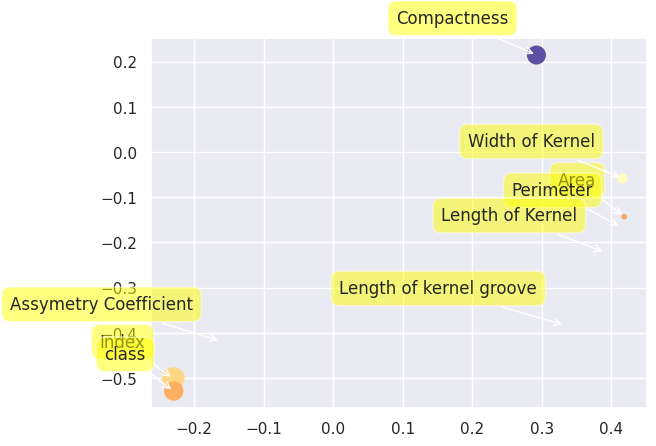

In [13]:
#Eigenvectors
A = pca.components_.T
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    print(A)
#Eigenvalues
Lambda = pca.explained_variance_


Text(0, 0.5, 'Cumulative explained variance')

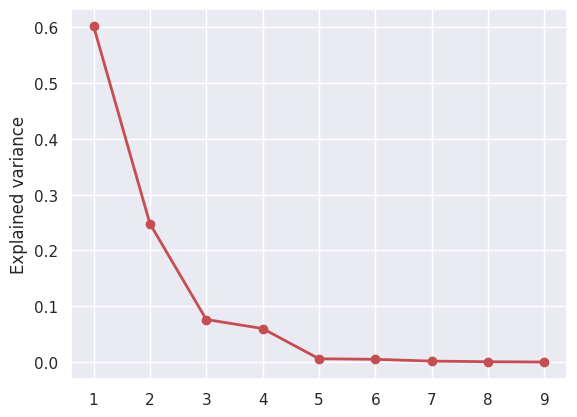

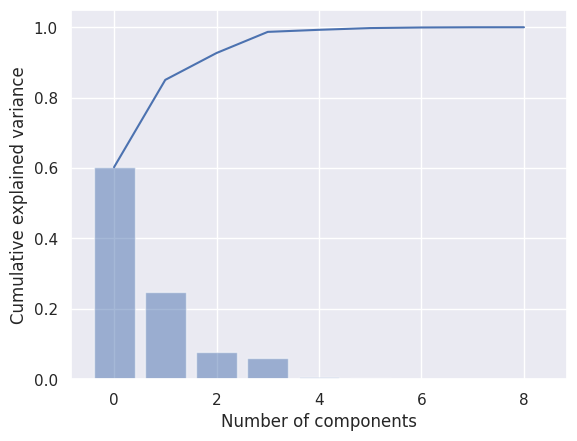

In [14]:
#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
Lambda = Lambda / sum(Lambda)
plt.plot(x,Lambda, 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance')

#Explained variance
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

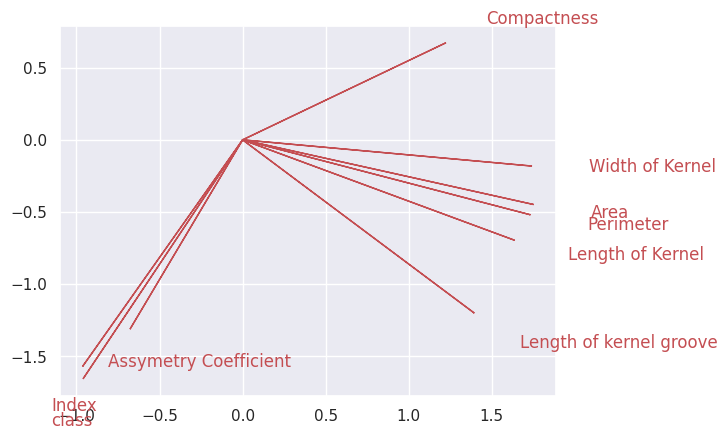

In [15]:
#Biplot
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

Text(0.5, 1.0, 'Principal components')

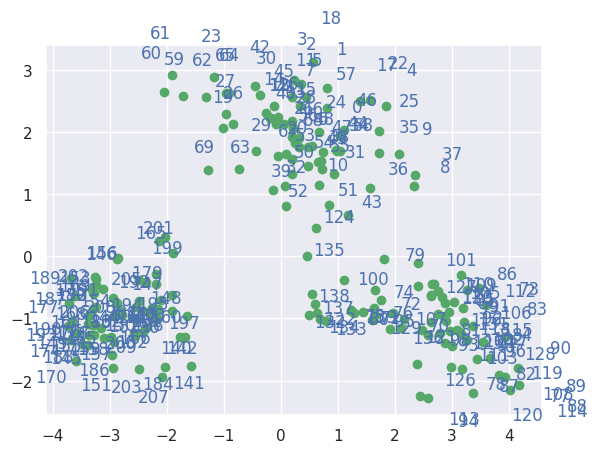

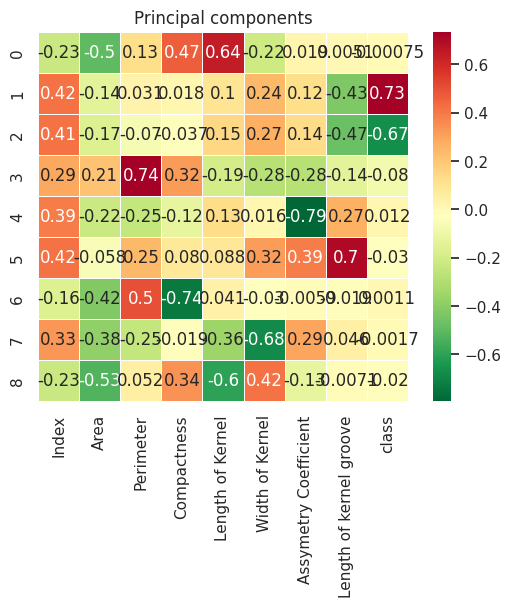

In [16]:
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

plt.figure()
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')

In [ ]:
#Machine learning

In [17]:
import pandas as pd
print(df.head())

      Index      Area  Perimeter  Compactness  Length of Kernel  \
0 -1.719713  0.141759   0.214949     0.000060          0.303493   
1 -1.703257  0.011161   0.008204     0.427494         -0.168223   
2 -1.686800 -0.191609  -0.359342     1.438945         -0.761817   
3 -1.670343 -0.346264  -0.474200     1.036904         -0.687336   
4 -1.653887  0.444196   0.329807     1.371233          0.066507   

   Width of Kernel  Assymetry Coefficient  Length of kernel groove     class  
0         0.141364              -0.983801                -0.382663 -1.221825  
1         0.196962              -1.783904                -0.919816 -1.221825  
2         0.207552              -0.665888                -1.186357 -1.221825  
3         0.318747              -0.958528                -1.227051 -1.221825  
4         0.803240              -1.559768                -0.474223 -1.221825  


In [20]:
from sklearn.model_selection import train_test_split

# Assuming the target variable is the last column, replace 'target' with the actual column name
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# linear regression

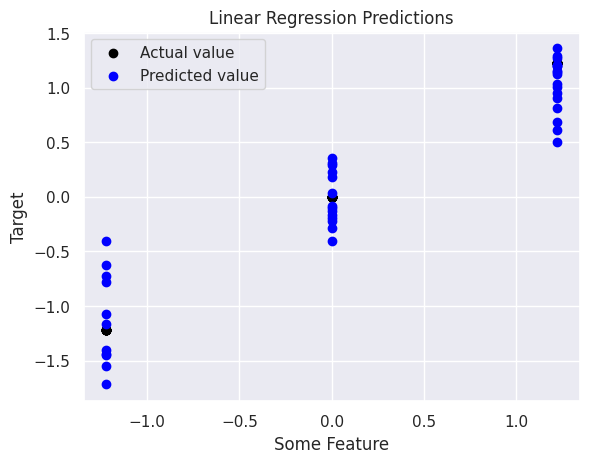

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Split the data into training and testing sets, keeping track of the indices
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

# Create a Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Plotting the results using the correct subset of 'class'
plt.scatter(df.loc[indices_test, 'class'], y_test, color='black', label='Actual value')
plt.scatter(df.loc[indices_test, 'class'], y_pred, color='blue', label='Predicted value')
plt.title('Linear Regression Predictions')
plt.xlabel('Some Feature')
plt.ylabel('Target')
plt.legend()
plt.show()



In [ ]:
# k-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_regressor.predict(X_test)

# Calculate the Mean Squared Error or another suitable metric for regression
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_knn)
print(f'KNN Regressor MSE: {mse}')


KNN Regressor MSE: 0.0


In [ ]:
#Decision tree

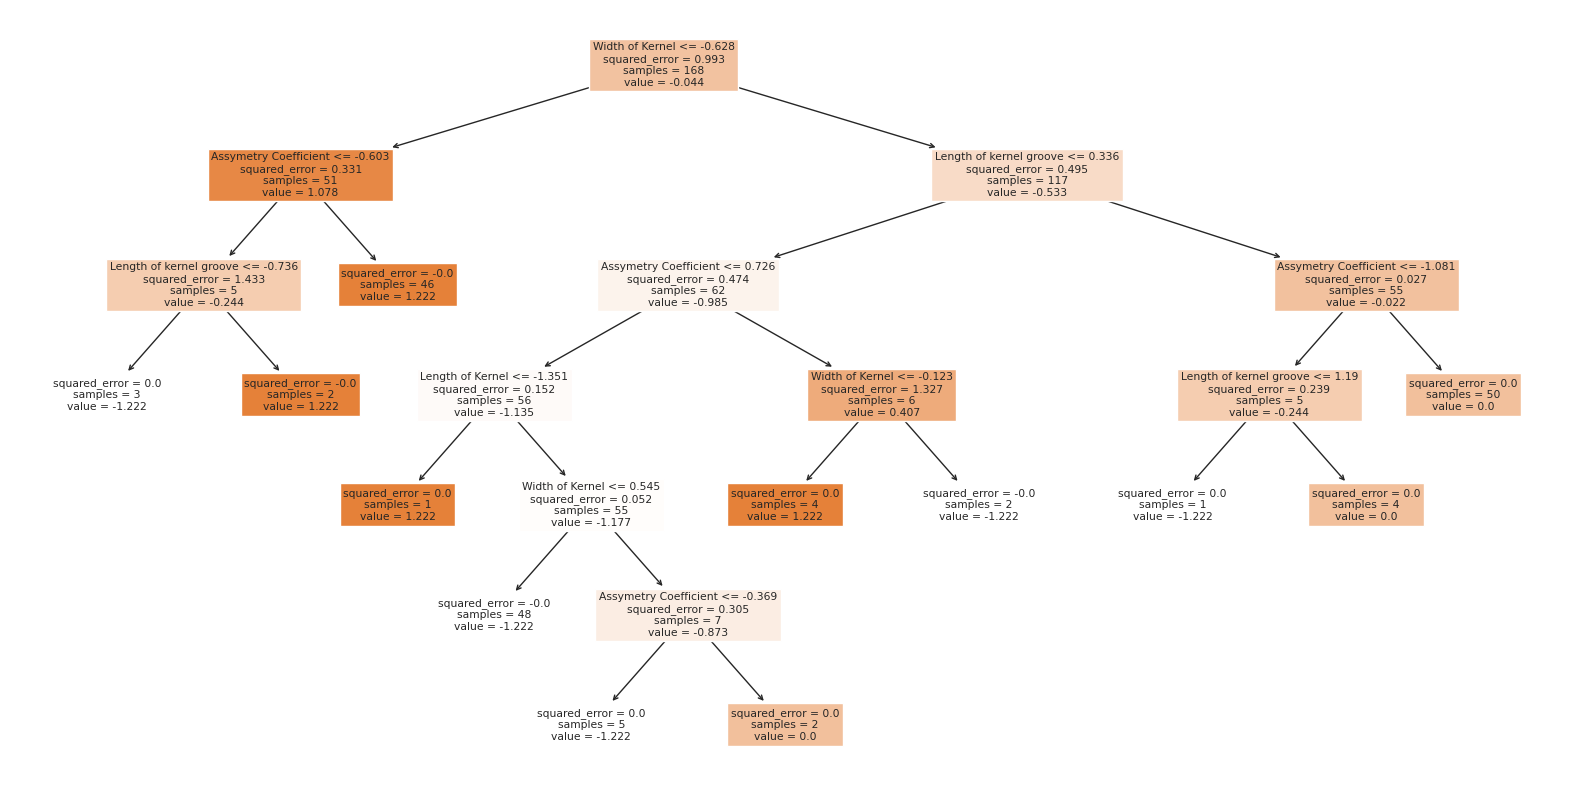

In [31]:

from sklearn.tree import DecisionTreeRegressor, plot_tree

# Initialize and fit the decision tree regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(reg, filled=True, feature_names=X.columns)
plt.show()

